# XGBoost - Detailed Explanation

## 1. What is XGBoost?
XGBoost (Extreme Gradient Boosting) is an advanced implementation of Gradient Boosting designed for speed, efficiency, and regularization.
It is widely used in machine learning competitions and industry applications due to its performance.

---

## 2. Why XGBoost is Better than Gradient Boosting
- Faster training (parallelization, efficient memory usage).
- Handles missing values automatically.
- Uses second-order optimization (gradient + hessian).
- Built-in regularization (L1 and L2).
- Supports advanced features like early stopping.

---

## 3. Important Hyperparameters
- **n_estimators**: Number of boosting rounds.
- **learning_rate (eta)**: Contribution of each tree.
- **max_depth**: Controls tree complexity.
- **subsample**: Fraction of rows used per tree.
- **colsample_bytree**: Fraction of features used per tree.
- **reg_lambda (L2)** and **reg_alpha (L1)**: Regularization parameters.

---

## 4. Advantages
- High accuracy, often state-of-the-art.
- Robust to overfitting (with tuning).
- Works with both regression and classification.
- Excellent for large-scale datasets.

---

## 5. Disadvantages
- More complex than Random Forest or Gradient Boosting.
- Requires careful hyperparameter tuning.
- Can be slower on very small datasets.

---

## 6. Use Cases
- Kaggle competitions (common winner model).
- Fraud detection.
- Sales forecasting.
- Search ranking and recommendation systems.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [3]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [4]:
xgb_clf = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=1.0,
    colsample_bytree=1.0,
    random_state=42,
    use_label_encoder=False,
    eval_metric="mlogloss"
)
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



C:\Users\GARV BEHL\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:17:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


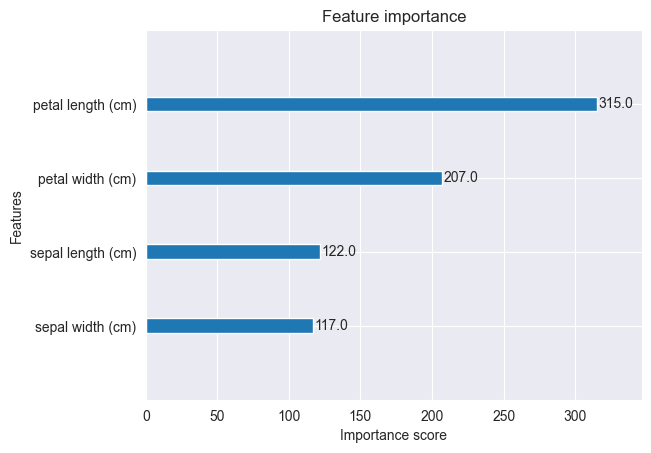

In [5]:
xgb.plot_importance(xgb_clf)
plt.show()

In [6]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
grid_search = GridSearchCV(
    estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
best_pred = best_model.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, best_pred))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Tuned Model Accuracy: 1.0


C:\Users\GARV BEHL\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:18:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
